In [1]:
# default_exp core

In [12]:
import torch
import matplotlib.pyplot as plt

In [2]:
from nbdev.showdoc import *

# Core functions

In [3]:
#export
def stats(x):
    "Returns `mean` and `std` of a tensor"
    return x.mean(),x.std()

In [4]:
t = torch.randn((5,5))
t

tensor([[ 1.0636,  0.6963, -2.0635,  0.2090,  0.3509],
        [-0.1821,  0.2098, -1.3676, -1.4209, -2.5511],
        [-0.9911,  0.2039, -0.9624, -1.2587, -0.3814],
        [-0.0240, -1.2503, -1.2545,  0.4914, -0.1319],
        [-0.0804, -1.8127,  0.6779,  0.4469, -0.1411]])

In [5]:
stats(t)

(tensor(-0.4610), tensor(0.9629))

In [8]:
#export
def log_softmax(x):
    
    return x - x.exp().sum(-1).log().unsqueeze(-1)

In [7]:
log_softmax(t)

tensor([[-0.9754, -1.3426, -4.1025, -1.8300, -1.6881],
        [-1.1533, -0.7614, -2.3388, -2.3922, -3.5223],
        [-2.0716, -0.8766, -2.0429, -2.3392, -1.4620],
        [-1.4249, -2.6513, -2.6554, -0.9095, -1.5328],
        [-1.7829, -3.5151, -1.0246, -1.2556, -1.8435]])

In [9]:
#export
def plotdist(x):
    "Plot distribution `x`"
    fig = plt.figure(figsize=(4,3))
    m,s = x.mean(), x.std()
    n,_,_ = plt.hist(x.reshape(-1),bins=100);
    l = [i*s for i in (-3,-2,-1,1,2,3)] # three sigmas
    l.append(m) # plus mean
    plt.vlines(l, 0, n.max(), color='white', alpha=0.2)
    ax = plt.title(f'Mean = {round(float(m),3)}; $\sigma$ = {round(float(s),3)}');

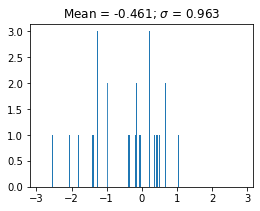

In [13]:
plotdist(t)

In [10]:
#hide
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted 01_mnist.ipynb.
Converted 99_index.ipynb.
